<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-2, 2, 11)
p = lambda x: x**3+2*x**2+x+1
y_or = p(x)
perturbacion = np.random.normal(0, 1, len(x))  # Perturbación aleatoria
y = y_or + perturbacion

In [3]:
lag = lagrange(x, y)
xi = 1.5
yi = lag(xi)
print(lag)
print(lag.c)

       10           9        8          7         6         5         4
1.497 x  + 0.07335 x - 12.8 x - 0.6038 x + 36.11 x + 1.626 x - 38.79 x
           3         2
 - 0.8965 x + 15.38 x + 2.168 x + 0.5289
[  1.49722968   0.0733502  -12.80019186  -0.60375103  36.10625331
   1.62557237 -38.79456175  -0.89646463  15.38037065   2.16775307
   0.52894968]


In [4]:
sc = CubicSpline(x, y)
xi = 1.5
yi = sc(xi)
print(sc.c.T)

[[ -3.11414408  -0.16291629   4.58614785  -1.00554463]
 [ -3.11414408  -3.89988918   2.96102567   0.60354268]
 [ 18.56270619  -7.63686207  -1.65367483   0.96466546]
 [-27.48909318  14.63838536   1.14693449   0.26931079]
 [ 35.75997516 -18.34852645  -0.33712195   1.31092428]
 [-36.82668108  24.56344374   2.14884497   0.52894968]
 [ 34.08207466 -19.62857356   4.12279304   2.96173108]
 [-21.51913467  21.26991603   4.77933003   3.6515293 ]
 [  7.9313935   -4.55304557  11.46607822   7.58922326]
 [  7.9313935    4.96462663  11.63071065  11.95477644]]


In [5]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    if x[i]<=xi<=x[i+1]:
      print(f"Intervalo [{x[i]}, {x[i+1]}]:")
      #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
      #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
      d = coefs[0, i]
      c = coefs[1, i]
      b = coefs[2, i]
      a = coefs[3, i]

      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [1.2000000000000002, 1.6]:
y = 7.589223e+00 + 1.146608e+01*(x-1.2000000000000002) + -4.553046e+00*(x-1.2000000000000002)**2 + 7.931394e+00*(x-1.2000000000000002)**3
xi = 1.5,    yii = 10.833420250862567 [10.833420250862567]


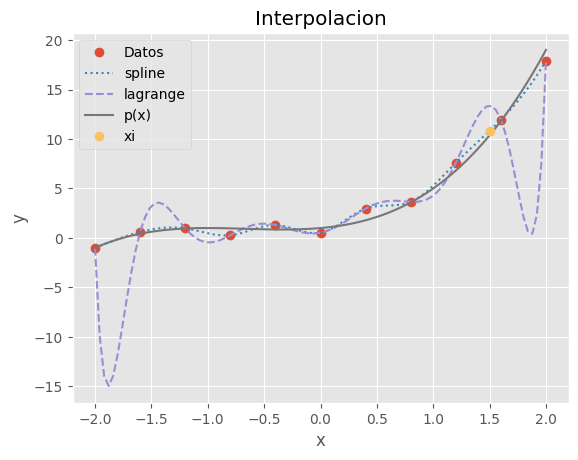

In [8]:
xs = np.linspace(x.min(),x.max(),100)
plt.style.use('ggplot')#('seaborn-v0_8-dark-palette')
plt.plot(x, y, 'o',label='Datos')
plt.plot(xs, sc(xs), ':',label='spline')
plt.plot(xs, lag(xs), '--',label='lagrange')
plt.plot(xs, p(xs), '-',label='p(x)')
plt.plot(xi, yi, 'o',label='xi')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacion')
#plt.grid()
plt.show()